In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 

# Visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

# Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the data

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sample_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
# Inspect the train dataset

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
# Merge train and test datasets, so easy for process them together

all_data = pd.concat([train,test])

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Get the information of all dataset

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
# Summarise of the statistical information

all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
# Find the total number of missing value in each column

all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Text(0.5, 1.0, 'The percentage of Survival')

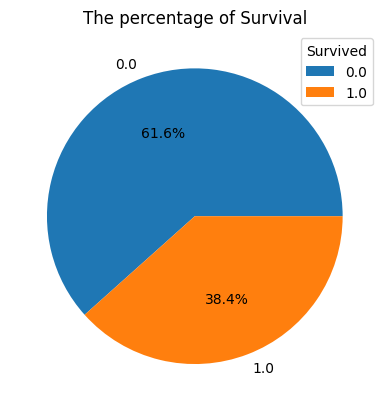

In [10]:
# Create a pie chart to see the percentage of Survived (Target variable)

survival = all_data['Survived'].value_counts()

plt.pie(survival,labels=survival.index, autopct="%1.1f%%")

plt.legend(title='Survived')
plt.title('The percentage of Survival')

In [11]:
# Get the exsample of 'Name' column

all_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [12]:
# Create 'Title' column from 'Name' column

all_data['Title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [13]:
# Find the total number of value in each title

all_data['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [14]:
# Group the 'Title' values

all_data['Title'] = all_data['Title'].replace(['Miss','Ms', 'Mlle'], 'Miss')
all_data['Title'] = all_data['Title'].replace(['Mrs', 'Mme'], 'Mrs')
all_data['Title'] = all_data['Title'].replace(['Capt','Col', 'Major','Dr', 'Rev'], 'Officer')
all_data['Title'] = all_data['Title'].replace(['Sir','Lady','the Countess','Jonkheer','Dona','Don'], 'Royalty')

In [15]:
# Find the total number of value after grouping

all_data['Title'].value_counts()

Title
Mr         757
Miss       264
Mrs        198
Master      61
Officer     23
Royalty      6
Name: count, dtype: int64

In [16]:
# Find the total number of Survived group by Title

all_data.groupby(['Title','Survived'])['Title'].value_counts()

Title    Survived
Master   0.0          17
         1.0          23
Miss     0.0          55
         1.0         130
Mr       0.0         436
         1.0          81
Mrs      0.0          26
         1.0         100
Officer  0.0          13
         1.0           5
Royalty  0.0           2
         1.0           3
Name: count, dtype: int64

In [17]:
# Try to create pivot table 

pd.pivot_table(all_data, index = 'Survived', columns = 'Title', values = 'Fare' ,aggfunc ='count')

Title,Master,Miss,Mr,Mrs,Officer,Royalty
Survived,,,,,,
0.0,17,55,436,26,13,2
1.0,23,130,81,100,5,3


In [18]:
# Try to use crosstab function

pd.crosstab(all_data['Title'],all_data['Survived']).T

Title,Master,Miss,Mr,Mrs,Officer,Royalty
Survived,,,,,,
0.0,17,55,436,26,13,2
1.0,23,130,81,100,5,3


Text(0.5, 1.0, 'Distribution of Survived by Title')

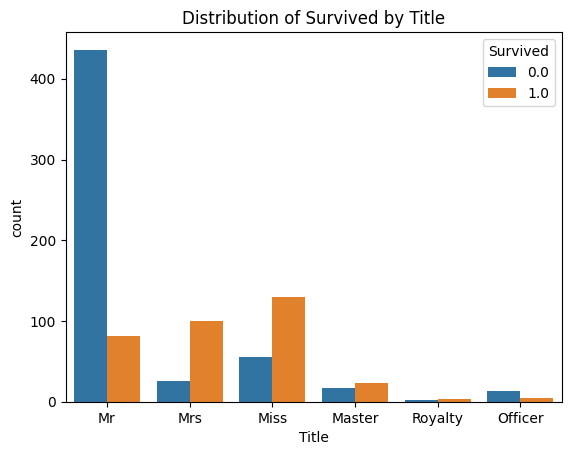

In [19]:
# Create a bar chart for the Distribution of Survived by Title

sns.countplot(x=all_data['Title'], hue='Survived', data=all_data)

plt.title('Distribution of Survived by Title')

Text(0.5, 1.0, 'Distribution of Survived by Sex')

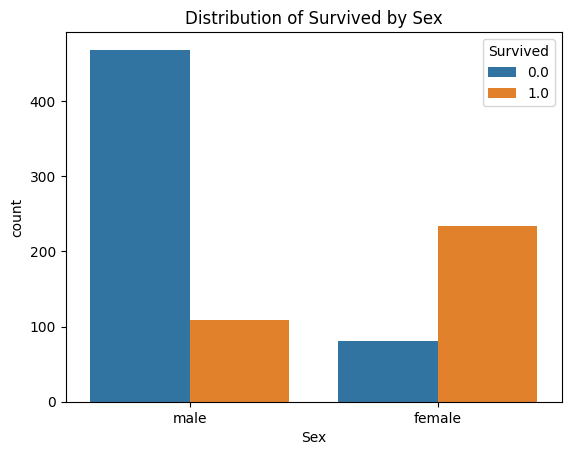

In [20]:
# Create a bar chart to see the Distribution of Survived by Sex

sns.countplot(x=all_data['Sex'], hue='Survived', data=all_data)

plt.title('Distribution of Survived by Sex')

In [21]:
# Check the missing value of 'Embarked' column

all_data['Embarked'].isnull().sum()

2

In [22]:
# Get the 2 rows of missing value 

all_data[all_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [23]:
# Fill missing value with mode

all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)

# Check the missing value again

all_data['Embarked'].isnull().sum()

0

In [24]:
# Total number of Survived group by Embarked

all_data.groupby(['Embarked','Survived'])['Survived'].value_counts()

Embarked  Survived
C         0.0          75
          1.0          93
Q         0.0          47
          1.0          30
S         0.0         427
          1.0         219
Name: count, dtype: int64

In [25]:
# Try to use crosstab 

pd.crosstab(all_data['Embarked'],all_data['Survived']).T

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,219


Text(0.5, 1.0, 'Distribution of Survived by Embarked')

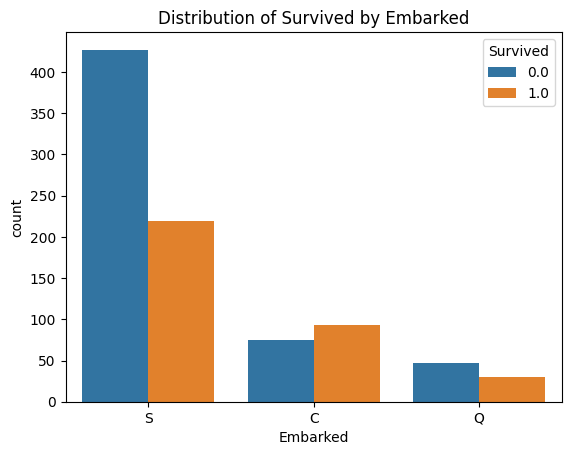

In [26]:
# Create a bar chart for the Distribution of Survived by Embarked

sns.countplot(x=all_data['Embarked'], hue='Survived', data=all_data)

plt.title('Distribution of Survived by Embarked')

In [27]:
# Check the total number of missing value of 'Cabin' column

all_data['Cabin'].isnull().sum()

1014

In [28]:
# Percentage of the missing values of 'Cabin' column

(all_data['Cabin'].isnull().sum() / len(all_data) *100).round(2)

77.46

In [29]:
# Get the unique of 'Cabin' column

all_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
# Get total number of unique

all_data['Cabin'].nunique()

186

In [31]:
# Fill missing values with 'X'
# And group the cabin by select the first letter of Cabin

all_data['Cabin'] = all_data['Cabin'].apply(lambda a: 'X' if pd.isnull(a) else a[0])

In [32]:
# Fill missing values with 'X'
# And group the cabin by select the first letter of Cabin

all_data['Cabin'] = all_data['Cabin'].apply(lambda a: 'X' if pd.isnull(a) else a[0])

In [33]:
# Total number of Survived group by Cabin

all_data.groupby(['Cabin','Survived'])['Survived'].value_counts()

Cabin  Survived
A      0.0           8
       1.0           7
B      0.0          12
       1.0          35
C      0.0          24
       1.0          35
D      0.0           8
       1.0          25
E      0.0           8
       1.0          24
F      0.0           5
       1.0           8
G      0.0           2
       1.0           2
T      0.0           1
X      0.0         481
       1.0         206
Name: count, dtype: int64

In [34]:
# Try to use crosstab 

pd.crosstab(all_data['Cabin'],all_data['Survived']).T

Cabin,A,B,C,D,E,F,G,T,X
Survived,,,,,,,,,
0.0,8,12,24,8,8,5,2,1,481
1.0,7,35,35,25,24,8,2,0,206


Text(0.5, 1.0, 'Distribution of Survived by Cabin')

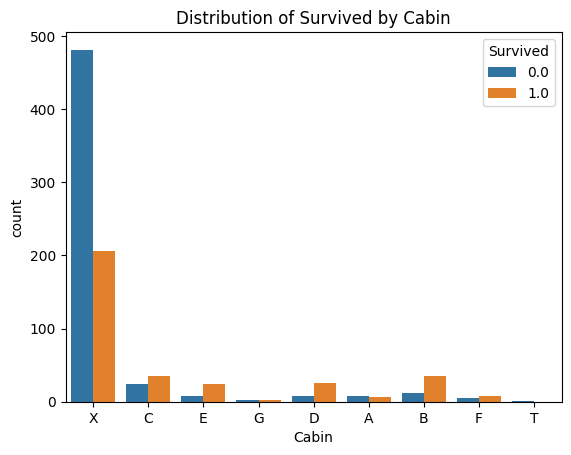

In [35]:
# Create a bar chart for the Distribution of Survived by Cabin

sns.countplot(x=all_data['Cabin'], hue='Survived', data=all_data)

plt.title('Distribution of Survived by Cabin')

In [36]:
# Check the missing value of 'Age' column

all_data['Age'].isnull().sum()

263

In [37]:
# Percentage of the missing values of 'Age' column

(all_data['Age'].isnull().sum() / len(all_data) *100).round(2)

20.09

In [38]:
# Find the mean vales of 'Age' group by 'Title'

all_data.groupby(['Title']).Age.mean()

Title
Master      5.482642
Miss       21.824366
Mr         32.252151
Mrs        36.918129
Officer    46.272727
Royalty    41.166667
Name: Age, dtype: float64

In [39]:
#Filling the missing values of Age with mean values group by Title.

all_data["Age"].fillna(all_data.groupby(['Title'])['Age'].transform("mean"), inplace=True)

# Check the missing value again

all_data['Age'].isnull().sum()

0

In [40]:
# Creating a Categorical variable for Ages

all_data['AgeGroup'] = ''
all_data['AgeGroup'].loc[(all_data['Age'] < 18)] = 'Young'
all_data['AgeGroup'].loc[(all_data['Age'] >= 18) & (all_data['Age'] < 40)] = 'Adult'
all_data['AgeGroup'].loc[(all_data['Age'] >= 40) & (all_data['Age'] < 56)] = 'Middle age'
all_data['AgeGroup'].loc[(all_data['Age'] >= 56)] = 'Senior'

# Total number of Survived group by Age

pd.crosstab(all_data['AgeGroup'], all_data['Survived']).T

AgeGroup,Adult,Middle age,Senior,Young
Survived,,,,
0.0,392,76,27,54
1.0,218,49,12,63


Text(0.5, 1.0, 'Distribution of Survived by Age AgeGroup')

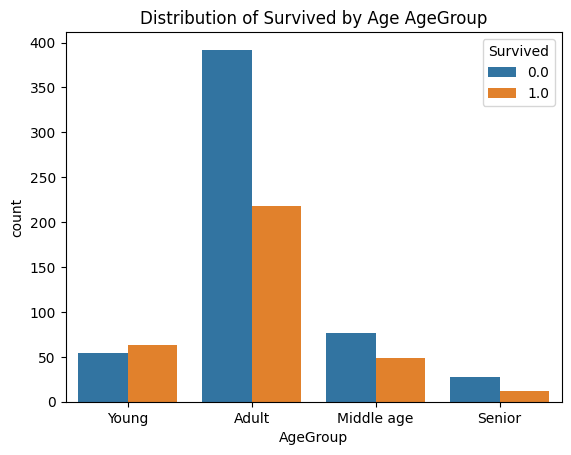

In [41]:
# Create a bar chart for the Distribution of Survived by 'Age Group' 

order = ['Young','Adult','Middle age', 'Senior']

sns.countplot(x=all_data['AgeGroup'], hue='Survived', data=all_data, order=order)

plt.title('Distribution of Survived by Age AgeGroup')

In [42]:
# Try to create Age Bin

all_data['AgeBin'] = pd.qcut(all_data['Age'], 4)

# Total number of Survived group by Age Bin

pd.crosstab(all_data['AgeBin'], all_data['Survived']).T

AgeBin,"(0.169, 21.824]","(21.824, 30.0]","(30.0, 36.0]","(36.0, 80.0]"
Survived,,,,
0.0,133,126,163,127
1.0,111,79,66,86


In [43]:
# Change the label of Age Bin

label = LabelEncoder()

all_data['AgeBin'] = label.fit_transform(all_data['AgeBin'])

# Check the table again

pd.crosstab(all_data['AgeBin'], all_data['Survived']).T

AgeBin,0,1,2,3
Survived,,,,
0.0,133,126,163,127
1.0,111,79,66,86


Text(0.5, 1.0, 'Distribution of Survived by Age Bin')

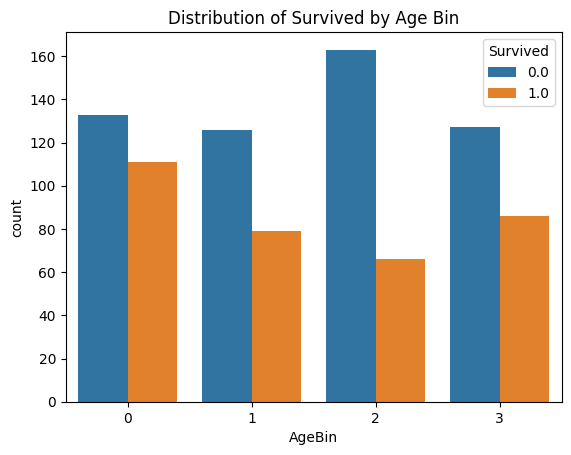

In [44]:
# Create a bar chart for the Distribution of Survived by 'Age Bin' 

sns.countplot(x=all_data['AgeBin'], hue='Survived', data=all_data)

plt.title('Distribution of Survived by Age Bin')

In [45]:
# Check the missing value of 'Fare' column

all_data['Fare'].isnull().sum()

1

In [46]:
# Get the 1 row of missing value 

all_data[all_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,AgeBin
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,X,S,Mr,Senior,3


<Axes: xlabel='Fare', ylabel='Count'>

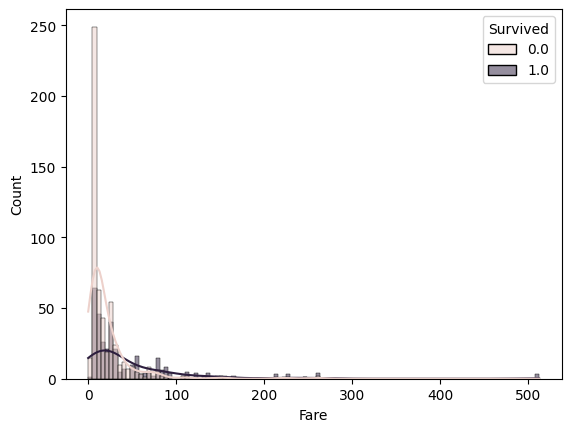

In [47]:
# Fill missing fare with median

all_data['Fare'].fillna(all_data['Fare'].median(), inplace = True)

# Create a histogram of Fare

sns.histplot(data = all_data, x = 'Fare', hue = 'Survived',kde = True)

In [48]:
# Create Fare Bin

all_data['FareBin'] = pd.qcut(all_data['Fare'], 5)

# Total number of Survived group by Fare Bin

pd.crosstab(all_data['FareBin'], all_data['Survived']).T

FareBin,"(-0.001, 7.854]","(7.854, 10.5]","(10.5, 21.558]","(21.558, 41.579]","(41.579, 512.329]"
Survived,,,,,
0.0,140,147,98,103,61
1.0,39,37,73,82,111


In [49]:
# Change the label of Fare Bin

label = LabelEncoder()

all_data['FareBin'] = label.fit_transform(all_data['FareBin'])

# Check the table again

pd.crosstab(all_data['FareBin'], all_data['Survived']).T

FareBin,0,1,2,3,4
Survived,,,,,
0.0,140,147,98,103,61
1.0,39,37,73,82,111


Text(0.5, 1.0, 'Distribution of Survived by FareBin')

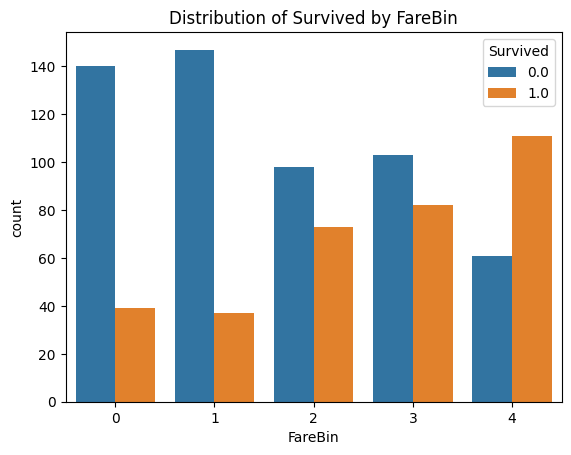

In [50]:
# Create a bar chart for the Distribution of Survived by 'FareBin' 

sns.countplot(x=all_data['FareBin'], hue='Survived', data=all_data)

plt.title('Distribution of Survived by FareBin')

Text(0.5, 1.0, 'Distribution of Survived by Ticket class')

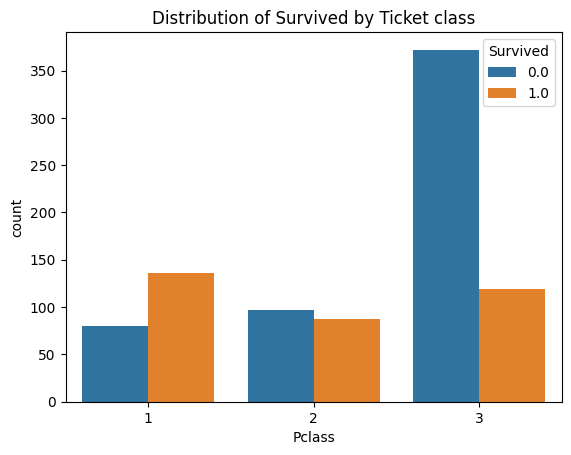

In [51]:
# Create a bar chart for the Distribution of Survived by 'Pclass' (Ticket class) 

sns.countplot(x=all_data['Pclass'], hue='Survived', data=all_data)

plt.title('Distribution of Survived by Ticket class')

Text(0.5, 1.0, 'Distribution of Pclass by Title')

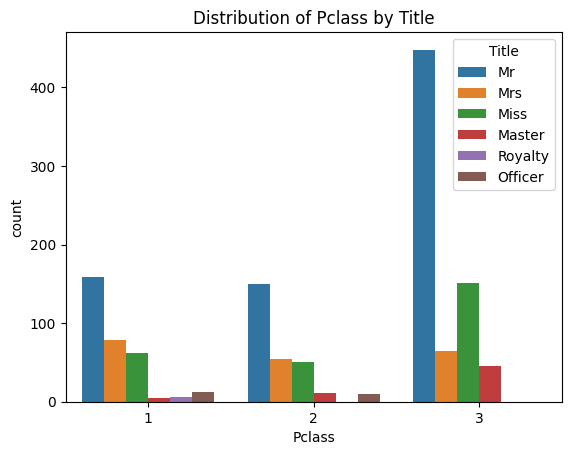

In [52]:
# Create a bar chart between Pclass and Title

sns.countplot(x=all_data['Pclass'], hue='Title', data=all_data)

plt.title('Distribution of Pclass by Title')

In [53]:
# Check the correlation between Pclass and Sex

pd.crosstab(all_data['Pclass'], all_data['Sex'])

Sex,female,male
Pclass,,
1,144,179
2,106,171
3,216,493


Text(0.5, 1.0, 'Distribution of Pclass by Sex')

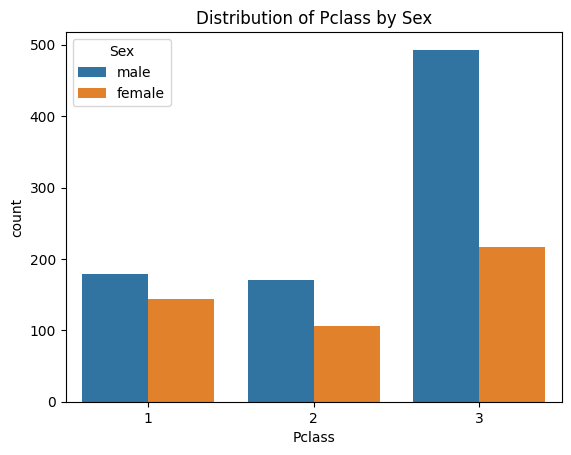

In [54]:
# Create a bar chart between Pclass and Sex

sns.countplot(x=all_data['Pclass'], hue='Sex', data=all_data)

plt.title('Distribution of Pclass by Sex')

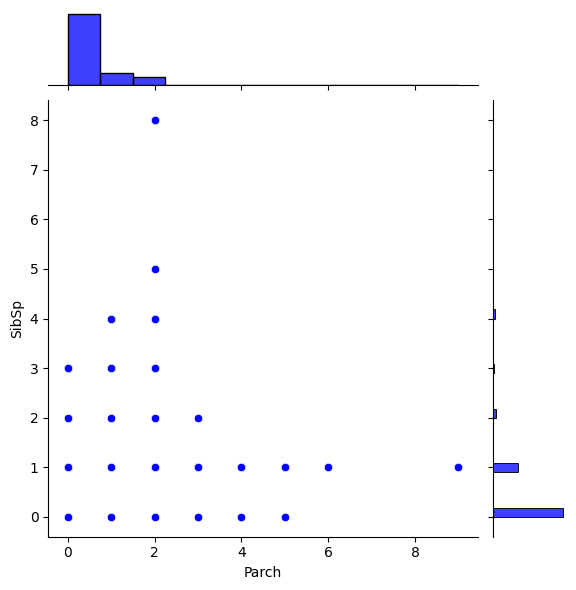

In [55]:
# Create jointplot between 'Parent/Childern' and 'Siblings/Spouses'


sns.jointplot(x='Parch',y='SibSp',data=all_data,color='blue')


In [56]:
# Create 'Family size' column by combine 'Parent/Childern' and 'Siblings/Spouses' and plus 1 is yourself

all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp'] + 1

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,AgeBin,FareBin,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,Mr,Adult,1,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,Adult,3,4,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,Adult,1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,Adult,2,4,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,Mr,Adult,2,1,1


In [57]:
# Total number of Survived group by Family Size 

pd.crosstab(all_data['FamilySize'],all_data['Survived']).T

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0.0,374,72,43,8,12,19,8,6,7
1.0,163,89,59,21,3,3,4,0,0


Text(0.5, 1.0, 'Distribution of Survived by Family Size')

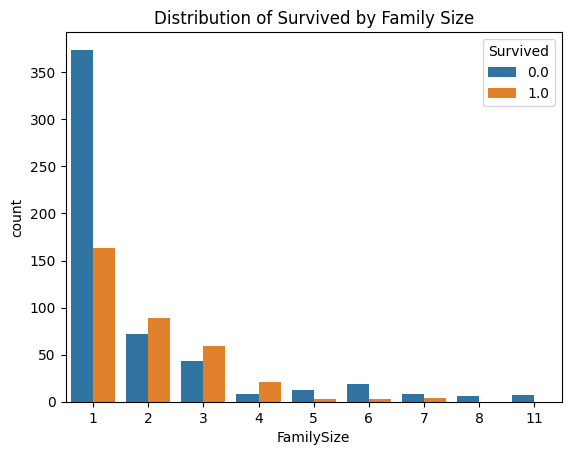

In [58]:
# Create a bar chart for the Distribution of Survived by 'Family Size' 

sns.countplot(x=all_data['FamilySize'], hue='Survived', data=all_data)

plt.title('Distribution of Survived by Family Size')

In [59]:
# Create a group of family

family_map = {1: 'Alone', 
              2: 'Small', 
              3: 'Small', 
              4: 'Small', 
              5: 'Medium', 
              6: 'Medium', 
              7: 'Large', 
              8: 'Large', 
              11: 'Large'}

all_data['FamilySizeGroup'] = all_data['FamilySize'].map(family_map)

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,AgeBin,FareBin,FamilySize,FamilySizeGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,Mr,Adult,1,0,2,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,Adult,3,4,2,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,Adult,1,1,1,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,Adult,2,4,2,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,Mr,Adult,2,1,1,Alone


Text(0.5, 1.0, 'Distribution of Survived by Family Size Group')

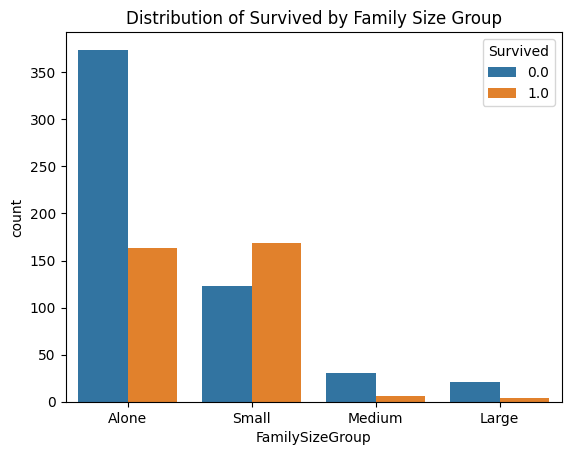

In [60]:
# Create a bar chart for the Distribution of Survived by 'FamilySizeGroup' 

order=['Alone','Small','Medium','Large']

sns.countplot(x=all_data['FamilySizeGroup'], hue='Survived', data=all_data, order=order)

plt.title('Distribution of Survived by Family Size Group')

In [61]:
# Get the example of 'Ticket' column

all_data['Ticket']

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1309, dtype: object

In [62]:
all_data['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [63]:
# Create 'LastName' column from 'Name' column

all_data['LastName'] = all_data['Name'].str.split(',').str[0]
# Find the total number of value in each Last Name

all_data['LastName'].value_counts()


LastName
Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: count, Length: 875, dtype: int64

In [64]:
all_data['LastName'].describe()

count          1309
unique          875
top       Andersson
freq             11
Name: LastName, dtype: object

In [65]:
# Find the duplicate ticket

duplicate_ticket = []
for tk in all_data['Ticket'].unique():
    same_ticket = all_data[all_data['Ticket'] == tk]['Ticket']
    if (same_ticket.count()>1):
        duplicate_ticket.append(all_data.loc[all_data['Ticket']==tk, ['Ticket','LastName', 'Fare', 'FamilySize', 'Survived']])

duplicate_ticket = pd.concat(duplicate_ticket)
duplicate_ticket.head(14)

,Ticket,LastName,Fare,FamilySize,Survived
1,PC 17599,Cumings,71.2833,2,1.0
234,PC 17599,Cumings,71.2833,2,NaN
3,113803,Futrelle,53.1000,2,1.0
137,113803,Futrelle,53.1000,2,0.0
6,17463,McCarthy,51.8625,1,0.0
146,17463,Hilliard,51.8625,1,NaN
7,349909,Palsson,21.0750,5,0.0
24,349909,Palsson,21.0750,5,0.0
374,349909,Palsson,21.0750,5,0.0
567,349909,Palsson,21.0750,5,0.0


In [66]:
# Create the ConnectedSurvival column

all_data['ConnectedSurvival'] = 0.5  #(Default values)

for _, data_same in all_data.groupby('Ticket'):
    if (len(data_same) > 1):
        for ind, row in data_same.iterrows():
            smax = data_same.drop(ind)['Survived'].max()
            smin = data_same.drop(ind)['Survived'].min()
            passid = row['PassengerId']
            
            if (smax == 1):
                all_data.loc[all_data['PassengerId'] == passid, 'ConnectedSurvival'] = 1
            elif (smin == 0):
                all_data.loc[all_data['PassengerId'] == passid, 'ConnectedSurvival'] = 0

all_data.groupby('ConnectedSurvival')['Survived'].mean()

ConnectedSurvival
0.0    0.225352
0.5    0.297989
1.0    0.727723
Name: Survived, dtype: float64

In [67]:
pd.crosstab(all_data['ConnectedSurvival'],all_data['Survived']).T

ConnectedSurvival,0.0,0.5,1.0
Survived,,,
0.0,110,384,55
1.0,32,163,147


In [68]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,AgeBin,FareBin,FamilySize,FamilySizeGroup,LastName,ConnectedSurvival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,Mr,Adult,1,0,2,Small,Braund,0.5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,Adult,3,4,2,Small,Cumings,0.5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,Adult,1,1,1,Alone,Heikkinen,0.5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,Adult,2,4,2,Small,Futrelle,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,Mr,Adult,2,1,1,Alone,Allen,0.5


In [69]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        1309 non-null   int64  
 1   Survived           891 non-null    float64
 2   Pclass             1309 non-null   int64  
 3   Name               1309 non-null   object 
 4   Sex                1309 non-null   object 
 5   Age                1309 non-null   float64
 6   SibSp              1309 non-null   int64  
 7   Parch              1309 non-null   int64  
 8   Ticket             1309 non-null   object 
 9   Fare               1309 non-null   float64
 10  Cabin              1309 non-null   object 
 11  Embarked           1309 non-null   object 
 12  Title              1309 non-null   object 
 13  AgeGroup           1309 non-null   object 
 14  AgeBin             1309 non-null   int64  
 15  FareBin            1309 non-null   int64  
 16  FamilySize         1309 non-nu

In [70]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'AgeGroup',
       'AgeBin', 'FareBin', 'FamilySize', 'FamilySizeGroup', 'LastName',
       'ConnectedSurvival'],
      dtype='object')

In [71]:
# Select only useful columns
# (also can use drop unnecessory columns)
# (You can try to change the feature selection and see the different results)

useful_columns = ['Survived', 
                  'Pclass', 
                  'AgeBin', 
                  'FareBin',
                  'Sex', 
                  'FamilySize',
                  'ConnectedSurvival']

data_final = all_data[useful_columns]

data_final.head()

,Survived,Pclass,AgeBin,FareBin,Sex,FamilySize,ConnectedSurvival
0,0.0,3,1,0,male,2,0.5
1,1.0,1,3,4,female,2,0.5
2,1.0,3,1,1,female,1,0.5
3,1.0,1,2,4,female,2,0.0
4,0.0,3,2,1,male,1,0.5


In [72]:
# Create dummy variables from categories 
# (also can use One Hot Encoder)

data_final = pd.get_dummies(data_final)

data_final.head()

,Survived,Pclass,AgeBin,FareBin,FamilySize,ConnectedSurvival,Sex_female,Sex_male
0,0.0,3,1,0,2,0.5,False,True
1,1.0,1,3,4,2,0.5,True,False
2,1.0,3,1,1,1,0.5,True,False
3,1.0,1,2,4,2,0.0,True,False
4,0.0,3,2,1,1,0.5,False,True


<Axes: >

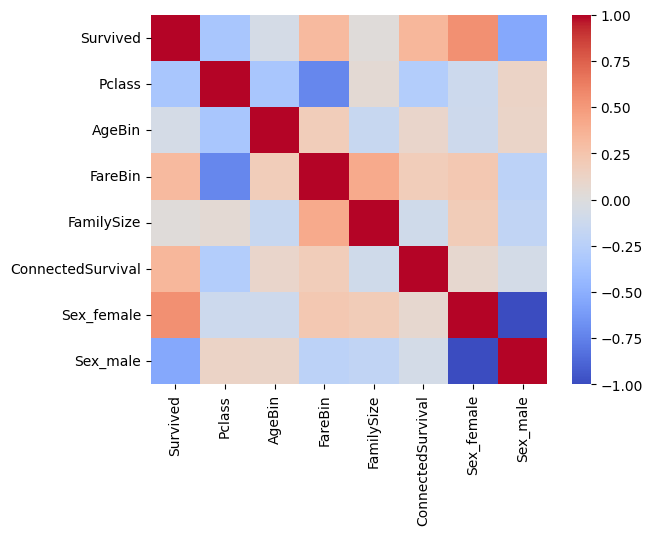

In [73]:
# Create heatmap to see the correlation between variables

sns.heatmap(data_final.corr(),cmap = "coolwarm")

In [74]:
# The correlation to Survived

data_final.corr()['Survived'].sort_values(ascending=False).to_frame()

,Survived
Survived,1.000000
Sex_female,0.543351
ConnectedSurvival,0.343614
FareBin,0.317386
FamilySize,0.016639
AgeBin,-0.062880
Pclass,-0.338481
Sex_male,-0.543351


In [75]:
# Reform splits to train, test dataset

df_train = data_final[:len(train)]
df_test = data_final[len(train):]

df_test.drop('Survived', axis=1, inplace=True)
df_train.head()

,Survived,Pclass,AgeBin,FareBin,FamilySize,ConnectedSurvival,Sex_female,Sex_male
0,0.0,3,1,0,2,0.5,False,True
1,1.0,1,3,4,2,0.5,True,False
2,1.0,3,1,1,1,0.5,True,False
3,1.0,1,2,4,2,0.0,True,False
4,0.0,3,2,1,1,0.5,False,True


In [76]:
# Select X = Columns as Features

X = df_train.drop('Survived', axis=1)

# Select y = Target Variable

y = df_train['Survived']

In [77]:
# # Feature Importances

# importances = pd.DataFrame(rf.feature_importances_,index = X.columns)
# importances.sort_values(by = 0, inplace=True, ascending = False)

# plt.figure(figsize=(8, 5)) 
# sns.barplot(x=0, y=importances.index, data=importances).set_title('Feature Importances')

In [78]:
# Compare model to see how various different models perform with default parameters

classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest','SVC','XGB','GradientB','AdaB','ExtraTrees']

models=[LogisticRegression(),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        GaussianNB(),
        RandomForestClassifier(),
        SVC(),
        XGBClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier()]

cv_mean = []
cv_std = []

for model in models:
    model=model
    cv = cross_val_score(model,X,y,cv=10)
    cv_std.append(cv.std())
    cv_mean.append(cv.mean())

cv_dataframe = pd.DataFrame({'CV Mean':cv_mean,'Std':cv_std},index=classifiers)       
cv_dataframe=cv_dataframe.sort_values(by=['CV Mean'], ascending = False)
cv_dataframe

,CV Mean,Std
SVC,0.831648,0.035179
GradientB,0.831635,0.031846
ExtraTrees,0.830574,0.042829
Random Forest,0.829388,0.038267
XGB,0.826067,0.032084
Decision Tree,0.822684,0.041615
Logistic Regression,0.820449,0.019212
KNN,0.811411,0.033800
AdaB,0.810337,0.018289
Naive Bayes,0.793521,0.016374


In [79]:
# # # Extra Trees Classifier

# parameters = {'n_estimators':[100,200,300,500,1000],
#                'max_depth':range(1,10),
#                'criterion': ['gini', 'entropy']
#                 }

# et_tune = GridSearchCV(estimator=ExtraTreesClassifier(),
#                                   param_grid=parameters,
#                                   cv=10,
#                                   n_jobs = -1)
# et_tune.fit(X,y) 

# et_model = et_tune.best_estimator_

# print (et_tune.best_score_)
# print (et_tune.best_params_)
# print (et_tune.best_estimator_)

In [80]:
# # After run the code above, I will get the best parameter for the model

# et_model = ExtraTreesClassifier(criterion='gini',
#                                 n_estimators=300,
#                                 max_depth=6,
#                                 random_state=0)

# et_model.fit(X,y)

# et_cv =cross_val_score(et_model,X,y, cv = 10,scoring = "accuracy").mean()

# et_cv

In [81]:
# # Decision Tree Classifier

# parameters = {'max_depth':range(1,30), 
#               'criterion': ["entropy", "gini"]}

# dt_tune = GridSearchCV(estimator=DecisionTreeClassifier(), 
#                         param_grid=parameters, 
#                         verbose=False, 
#                         cv=10,
#                         n_jobs = -1)

# dt_tune.fit(X, y) 

# dt_model = dt_tune.best_estimator_

# print (dt_tune.best_score_)
# print (dt_tune.best_params_)
# print (dt_tune.best_estimator_)

In [82]:
# # Support Vector Classifier

# parameters = {'kernel': ['rbf'], 
#               'gamma': [0.01,0.02,0.05,0.1,0.5],
#               'C': [0.1, 0.5,1,2,3,4,5,6,7,8]},

# svc_tune = GridSearchCV(SVC(probability=True), 
#                          param_grid=parameters, 
#                          cv=10) 

# svc_tune.fit(X,y)

# svc_model = svc_tune.best_estimator_

# print(svc_tune.best_score_)
# print(svc_tune.best_params_)
# print(svc_tune.best_estimator_)

In [83]:
# # K Neighbors Classifier

# parameters = {'n_neighbors':range(1,41), 
#               'weights':['uniform','distance']}

# knn_tune = GridSearchCV(estimator=KNeighborsClassifier(), 
#                          param_grid=parameters,
#                          cv=10,
#                          verbose = False, 
#                          n_jobs=-1)

# knn_tune.fit(X,y)

# knn_model = knn_tune.best_estimator_

# print(knn_tune.best_score_)
# print(knn_tune.best_params_)
# print(knn_tune.best_estimator_)

In [84]:
# # Extream Gradient Boosting Classifier

# parameters = {'n_estimators':[100,200,300,400,500],
#               'max_depth':range(1,10),
#               'learning_rate': [0.01,0.02,0.05,1],
#               'colsample_bytree': [0.75,0.8,0.85],
#               'subsample': [0.55, 0.6, 0.65,0.7],
#               'min_child_weight':[0.01,0.1]
#              }

# xgb_tune = GridSearchCV(estimator=XGBClassifier(),
#                          param_grid=parameters,
#                          cv=10,
#                          n_jobs = -1)
# xgb_tune.fit(X,y) 

# print ('XGB Best score :', xgb_tune.best_score_)
# print ('XGB Best parameter :', xgb_tune.best_params_)
# print ('XGB Best estimator :', xgb_tune.best_estimator_)

In [85]:
# # After run the code above, I will get the best parameter for the model

# xgb_model = XGBClassifier(n_estimators=100,
#                           learning_rate= 0.01,
#                           max_depth=6,
#                           colsample_bytree= 0.75,
#                           min_child_weight= 0.01,
#                           subsample= 0.6,
#                           random_state=0)

# xgb_model.fit(X,y)

# xgb_cv =cross_val_score(xgb_model,X,y, cv = 10,scoring = "accuracy").mean()
# xgb_cv

In [86]:
# # Random Forest Classifier

# parameters = {'n_estimators':[100,200,300,400,500],
#               'max_depth':range(1,10),
#               'min_samples_leaf': [2,4,6,8,10],
#               'min_samples_split': [2,4,6,8,10,12,14,16,20],
#               'criterion': ['gini', 'entropy']
#         }

# rf_tune = GridSearchCV(estimator=RandomForestClassifier(),
#                         param_grid=parameters,
#                         cv=10,
#                         n_jobs = -1)

# rf_tune.fit(X,y) 

# print ('RF best score :' , rf_tune.best_score_)
# print ('RF Best parameter :' , rf_tune.best_params_)
# print ('RF Best estimator :',rf_tune.best_estimator_)

In [87]:
# # After run the code above, I will get the best parameter for the model

# rf_model = RandomForestClassifier(criterion='entropy',
#                                   n_estimators=100,
#                                   max_depth=7,
#                                   min_samples_split=20,
#                                   min_samples_leaf=6,
#                                   oob_score=True,
#                                   random_state=0,
#                                   n_jobs=-1,
#                                   verbose=0) 

# rf_model.fit(X,y)

# rf_cv = cross_val_score(rf_model,X,y, cv = 10,scoring = "accuracy").mean()
# rf_cv

In [88]:
# # Gradient Boosting Classifier

# parameters = {'n_estimators':[100,200,300,400,500],
#               'max_depth':range(1,10),
#               'learning_rate': [0.01,0.02,0.05,1]
#               }

# gbm_tune = GridSearchCV(estimator=GradientBoostingClassifier(),
#                          param_grid=parameters,
#                          cv=10,
#                          n_jobs = -1)

# gbm_tune.fit(X,y) 

# print ('GBM best score :', gbm_tune.best_score_)
# print ('GBM best parameters :', gbm_tune.best_params_)
# print ('GBM best estimator :', gbm_tune.best_estimator_)

In [89]:
# # After run the code above, I will get the best parameter for the model

# gbm_model = GradientBoostingClassifier(n_estimators=100,
#                           learning_rate= 0.01,
#                           max_depth=3,
#                           random_state=0)

# gbm_model.fit(X,y)

# gbm_cv =cross_val_score(gbm_model,X,y, cv = 10,scoring = "accuracy").mean()
# gbm_cv

In [90]:
# # Ada Boost Classifier

# parameters = {'n_estimators':[100,200,300,500,1000],
#               'learning_rate':[0.01,0.02,0.5]
#               }

# adb_tune = GridSearchCV(AdaBoostClassifier(),
#                                  param_grid=parameters,
#                                  cv=10,
#                                  n_jobs = -1)
# adb_tune.fit(X,y) 

# adb_model = adb_tune.best_estimator_

# print (adb_tune.best_score_)
# print (adb_tune.best_params_)
# print (adb_tune.best_estimator_)

In [91]:
# Logistic Regression

## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 

C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]

## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']

## setting parameters for param_grid in GridSearchCV. 
parameters = {'penalty': penalties, 
              'C': C_vals}

logreg = LogisticRegression(solver='liblinear')

## Calling on GridSearchCV object. 
lo_tune = GridSearchCV(estimator=LogisticRegression(), 
                       param_grid = parameters,
                       cv = 10,
                       scoring = 'accuracy',
                       n_jobs =-1,
                      )

## Fitting the model
lo_tune.fit(X, y)

print(lo_tune.best_score_)
print(lo_tune.best_params_)
print(lo_tune.best_estimator_)

0.8204494382022472
{'C': 0.9, 'penalty': 'l2'}
LogisticRegression(C=0.9)


In [92]:
# Logistic Regression
# After run the code above, I will get the best parameter for the model

lo_model = LogisticRegression(C=0.9, penalty='l2')

lo_model.fit(X,y)

lo_cv =cross_val_score(lo_model,X,y, cv = 10,scoring = "accuracy").mean()

lo_cv

0.8204494382022472

In [93]:
# # Compare model after Hyperparameter tuning

# scores_list=[]

# scores_list = [["XGB",xgb_cv],
#                ["GBM",gbm_cv],
#                ["ET",et_cv],
#                ["RF",rf_cv], 
#                ["KNN",knn_tune.best_score_],
#                ["SVC",svc_tune.best_score_],
#                ["DT",dt_tune.best_score_],
#                ["ADB",adb_tune.best_score_],
#                ["LO",lo_cv]
#               ]

# scores = (pd.DataFrame(scores_list,columns = ["Model", "Score"])).sort_values(by=["Score"], ascending=False )

# scores

In [94]:
# # Define estimators
# estimators = [('RF',rf_model),
#               ('GBM',gbm_model),
#               #('DT',dt_model),
#               ('SVC',svc_model), 
#               #('XGB', xgb_model),
#               #('KNN',knn_model),
#               #('ET',et_model),
#               #('ADB',adb_model),
#               #('LO',lo_model)
#              ]

# voting_model = VotingClassifier(estimators=estimators,
#                                 voting='soft')

# voting_soft = voting_model.fit(X, y)

# voting_cv = cross_val_score(voting_model,X,y, cv = 10,
#                             scoring = "accuracy").mean()

# voting_cv


In [95]:
# Make predictions on the test dataset

lo_model = lo_model.predict(df_test).astype(int)

# Create a submission file

lo_output = pd.DataFrame({'PassengerId': test['PassengerId'],
                               'Survived': lo_model})
lo_output.to_csv('sumbmission_lo.csv', index=False)
lo_output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
